In [75]:
"""
2025-11-17 Maria Yli-Heikkilä
Plot the results to see how the adjustement works.


"""


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Results in:
fp = '/Users/myliheik/Documents/myPython/FBSadjusted/results/Food-supply-quantity-kg-capita-yr.csv'
df = pd.read_csv(fp)

# How many cases we have:
uniqueCases = df[['Area', 'Item Code', 'Domain']].drop_duplicates()
uniqueCases['Domain'].value_counts()

Domain
BiasCorrectedAdjusted    20374
Old FBS                  19815
New FBS                  19815
Name: count, dtype: int64

In [76]:
# Is there any with only one domain?
tmp = uniqueCases.groupby(['Area', 'Item Code']).size().reset_index()
len(tmp[tmp[0] == 1]) # Good! There should not be.

0

In [77]:
# How about 2? There should not be:
checkThese = tmp[tmp[0] == 2]
checkThese # Check these later

,Area,Item Code,0
9477,Land Locked Developing Countries,2511,2
9478,Land Locked Developing Countries,2513,2
9479,Land Locked Developing Countries,2514,2
9480,Land Locked Developing Countries,2515,2
9481,Land Locked Developing Countries,2516,2
...,...,...,...
16689,Small Island Developing States (SIDS),2946,2
16690,Small Island Developing States (SIDS),2948,2
16691,Small Island Developing States (SIDS),2949,2
16692,Small Island Developing States (SIDS),2960,2


In [53]:


#### FUNC:

def plotting7(data, mycountry, myElement, myItemCode, startingYear, axes):

    # Subset data:
    data22 = data[(data['Area'] == mycountry) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    #exclude BiasCorrectedAdjusted:
    data2 = data22[~(data22['Domain'] == 'BiasCorrectedAdjusted')]
    
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
        
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2
        
        
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]

    myItem = data3['Item'].values[0]
        
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    #ax.text(pd.to_datetime('1990', format='%Y'), data3[myItem].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
    

def plotting8(data, mycountry, myElement, myItemCode, startingYear, axes):

    # Subset data:
    data2 = data[(data['Area'] == mycountry) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
    
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    myItem = data3['Item'].values[0]

        
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]
    #print(data3['Item'].values[0])    
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    ax.text(pd.to_datetime('1990', format='%Y'), data3['Value'].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
      

<function matplotlib.pyplot.show(close=None, block=None)>

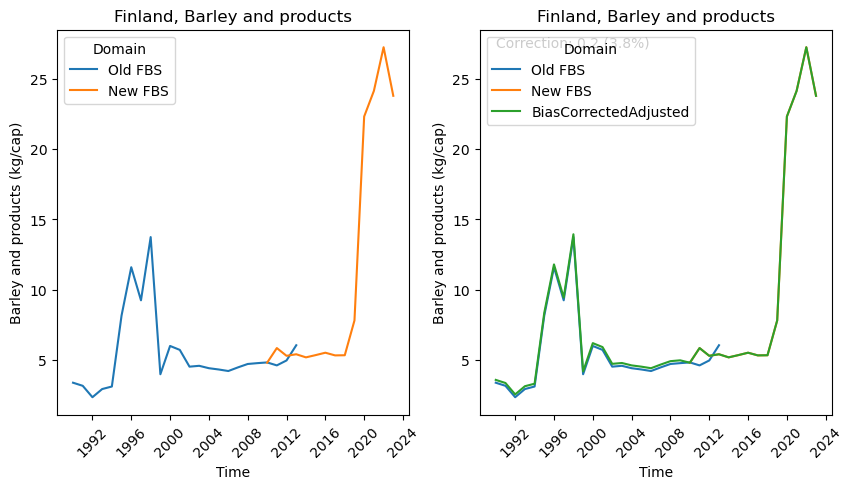

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

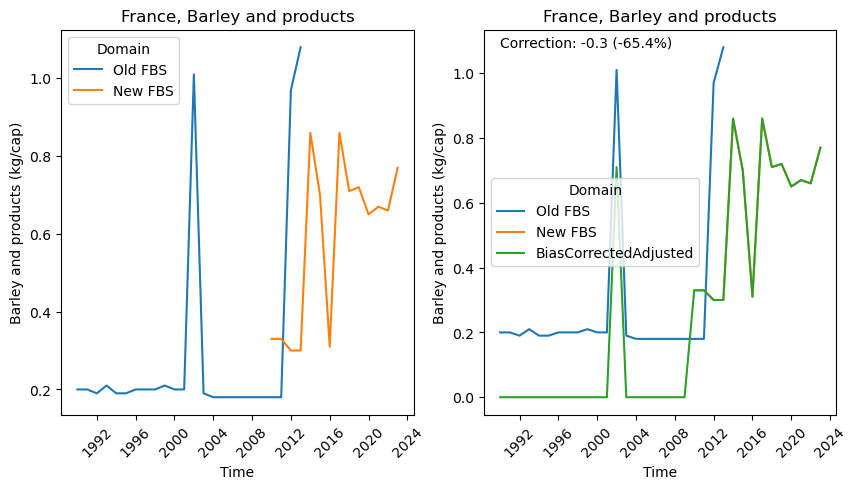

In [79]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'France'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

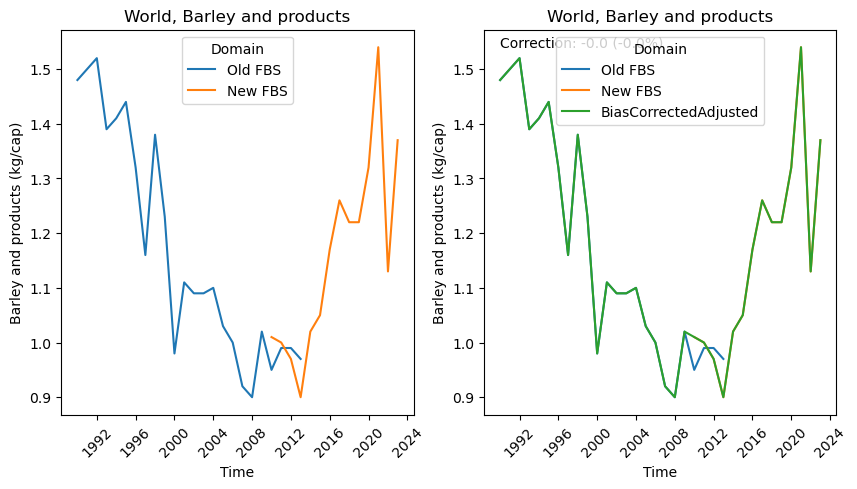

In [80]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'World'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

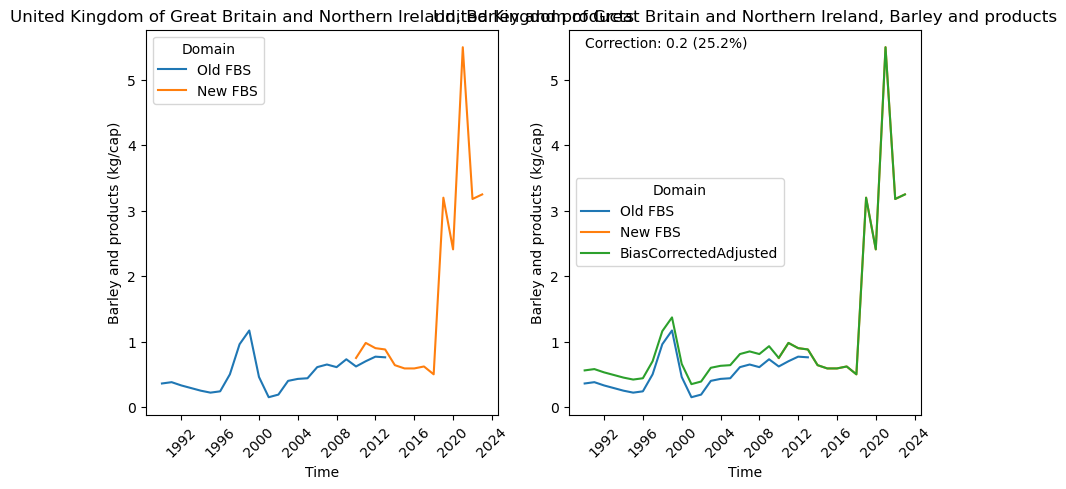

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

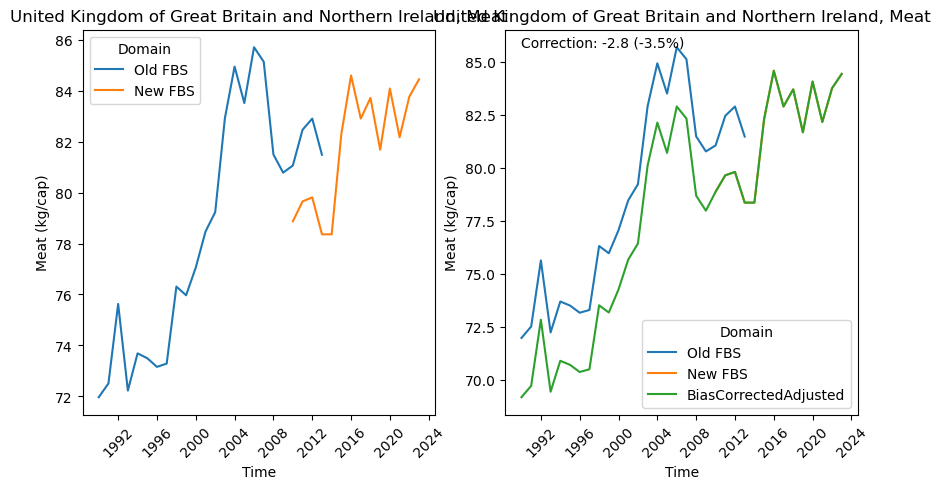

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2943
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

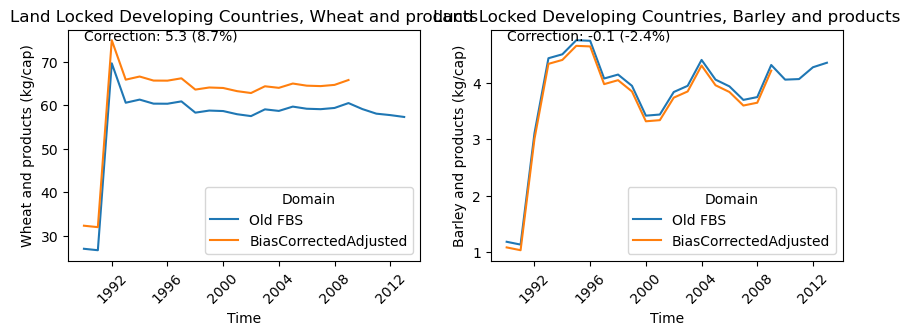

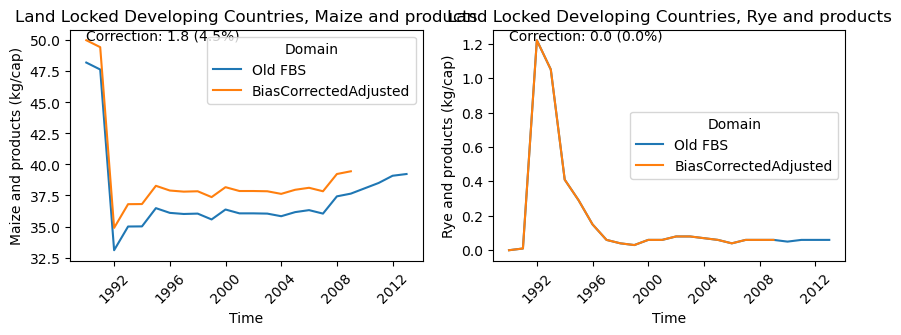

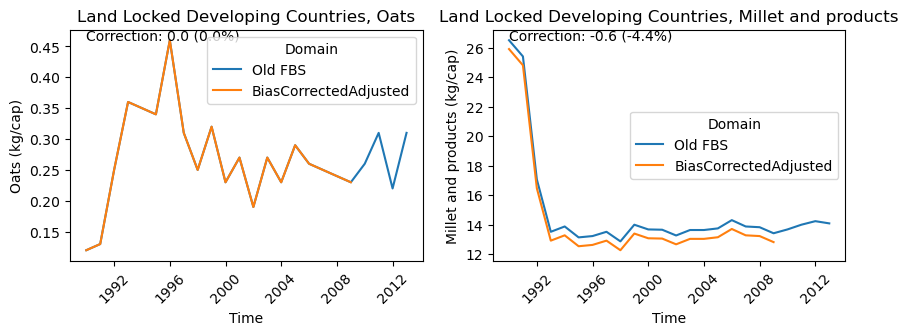

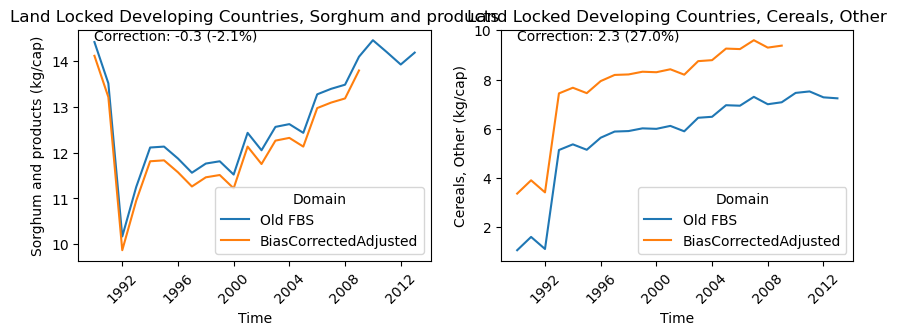

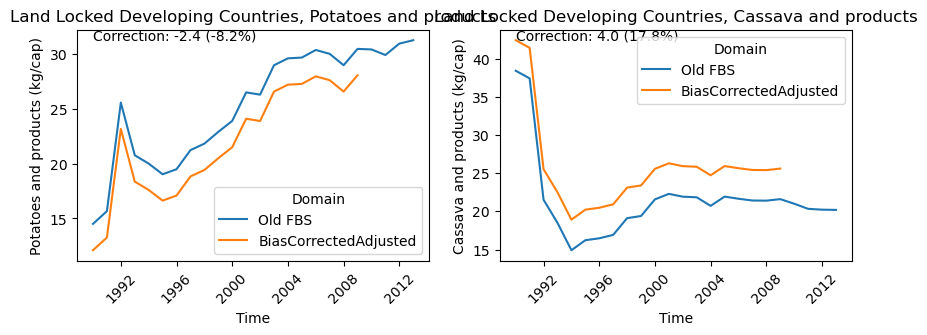

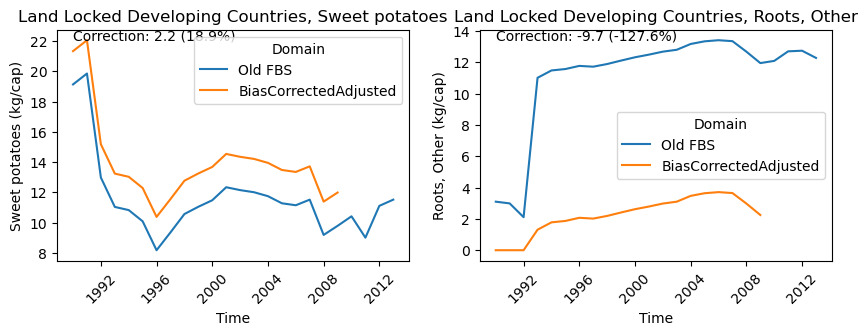

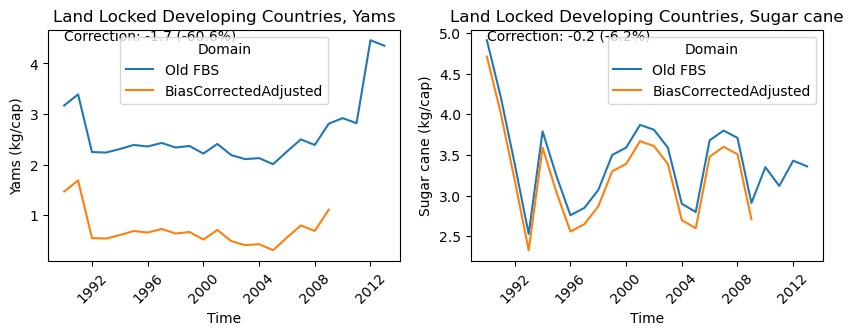

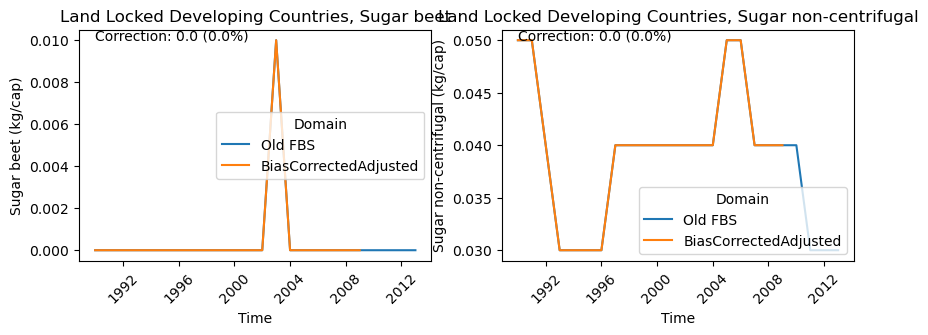

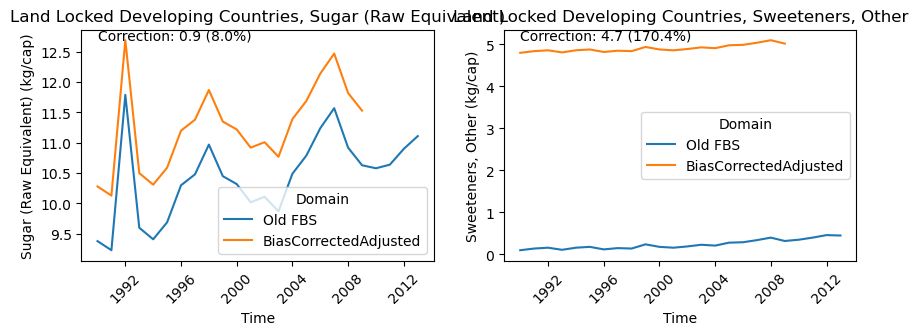

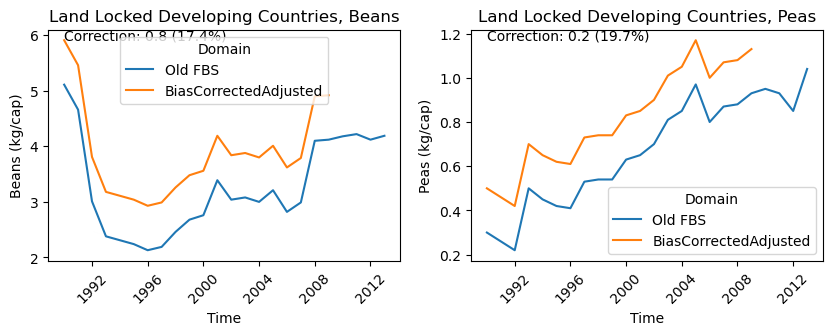

In [83]:
# Let's check those with only 2 domains:



for i in range(0, len(checkThese), 2):
    if i == 20:
        break
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

        mycountry = checkThese.iloc[i]['Area']
        myItemCode = checkThese.iloc[i]['Item Code']
        myElement = 'Food supply quantity (kg/capita/yr)'
        #print(myItemCode, mycountry)
        plotting8(df, mycountry, myElement, myItemCode, 1990, ax1)
        mycountry = checkThese.iloc[i+1]['Area']
        myItemCode = checkThese.iloc[i+1]['Item Code']

        plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)

        #plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
        plt.show




In [73]:
for i in range(0, len(checkThese), 2):
    if i == 20:
        break
    else:
        mycountry = checkThese.iloc[i]['Area']
        myItemCode = checkThese.iloc[i]['Item Code']
        myElement = 'Food supply quantity (kg/capita/yr)'
        print(checkThese.iloc[i][:])

Area         Land Locked Developing Countries
Item Code                                2511
0                                           2
Name: 9477, dtype: object
Area         Land Locked Developing Countries
Item Code                                2514
0                                           2
Name: 9479, dtype: object
Area         Land Locked Developing Countries
Item Code                                2516
0                                           2
Name: 9481, dtype: object
Area         Land Locked Developing Countries
Item Code                                2518
0                                           2
Name: 9483, dtype: object
Area         Land Locked Developing Countries
Item Code                                2531
0                                           2
Name: 9485, dtype: object
Area         Land Locked Developing Countries
Item Code                                2533
0                                           2
Name: 9487, dtype: object
Area         Lan

In [28]:
data['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti

In [41]:
data['Item'].unique()

array(['Cereals - Excluding Beer', 'Wheat and products',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Cereals, other', 'Starchy Roots',
       'Potatoes and products', 'Sugar & Sweeteners',
       'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Honey', 'Pulses',
       'Pulses, Other and products', 'Treenuts', 'Nuts and products',
       'Oilcrops', 'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Vegetable Oils', 'Soyabean Oil',
       'Groundnut Oil', 'Sunflowerseed Oil', 'Rape and Mustard Oil',
       'Cottonseed Oil', 'Palm Oil', 'Sesameseed Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Vegetables', 'Tomatoes and products',
       'Vegetables, other', 'Fruits - Excluding Wine',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, other', 'Stimulants',
       'Coffee and pr

In [48]:
data[data['Item'] == 'Meat'][['Item', 'Item Code']].head()

,Item,Item Code
6968,Meat,2943
6969,Meat,2943
6970,Meat,2943
6971,Meat,2943
6972,Meat,2943


In [50]:
data

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Domain,Note,MeanDiffBias,MeanDiffBiasPerc
0,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1961,1961,kg/cap,309.04,E,Old FBS,NaN,NaN,NaN
1,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1962,1962,kg/cap,300.20,E,Old FBS,NaN,NaN,NaN
2,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1963,1963,kg/cap,269.18,E,Old FBS,NaN,NaN,NaN
3,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1964,1964,kg/cap,297.75,E,Old FBS,NaN,NaN,NaN
4,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1965,1965,kg/cap,296.40,E,Old FBS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480973,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2009,2009,kg/cap,0.07,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
2480974,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2010,2010,kg/cap,0.07,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
2480975,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2011,2011,kg/cap,0.10,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
2480976,5817,'902,Net Food Importing Developing Countries,2680,'S2680,Infant food,645,Food supply quantity (kg/capita/yr),2012,2012,kg/cap,0.10,E,BiasCorrectedAdjusted,NaN,-0.0,-0.0
